In [2]:
import cvxpy as cp
import numpy as np
import pandas as pd

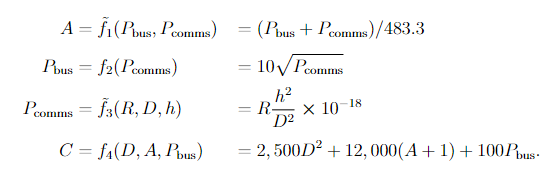

In [3]:
A, Pb, Pc, D, h, C, R = cp.Variable(7, pos=True) 

objective_fn = 2500*D**2+12000*(A+1)+100*Pb
constraints = [
  A >= (Pb+Pc)/483.307, Pb**2 == 100*Pc, Pc==R*h**2/D**2*1e-18, h>=400e3, R>=8e6]
problem = cp.Problem(cp.Minimize(objective_fn), constraints)
problem.solve(gp=True)

15300.9243514855

# Check the solution is tight

In [5]:
np.isclose(((Pb+Pc)/483.307).value, A.value)

True

# Values

In [6]:
from modeling.compute import prettyprintval

In [32]:
variables = {'$$A$$':A, '$$D$$':D, '$$h$$':h, '$$P_{comms}$$':Pc, '$$P_{bus}$$':Pb, '$$C$$':problem.objective}
formatted_vars = [(var_name, prettyprintval(var.value)) for var_name,var in variables.items()]
print(pd.DataFrame(formatted_vars, columns=['Variable', 'Value']))
# # Initialize the markdown table with headers
# md_string = "| Variable | Value |\n"
# md_string += "|----------|-------|\n"

# # Add rows for each variable in the dictionary
# for var, value in formatted_vars:
#     md_string += f"| {var} | {value} |\n"
# display(Markdown(md_string))

        Variable      Value
0          $$A$$      0.041
1          $$D$$       0.67
2          $$h$$  4.000×10⁵
3  $$P_{comms}$$      2.847
4    $$P_{bus}$$     16.874
5          $$C$$  1.530×10⁴
